# 1) Feedforward NN without scaling

In [5]:
import tensorflow as tf

print(f'tensorflow version {tf.__version__}')

from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 

import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout


tensorflow version 2.10.0


In [2]:
def dataLoad():
    test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')
    train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv')
    val = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv')
    print(train.head())
    
    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******training features******")
    print (x_train)
    y_train = train[['Real_tom_lsm']]
    print ("******training target******")
    print (y_train)
    
    x_test = test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******test features******")
    print (x_test)
    y_test = test[['Real_tom_lsm']]
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******validation features******")
    print (x_val)
    y_val = val[['Real_tom_lsm']]
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

### Basic NN: tanh vs. relu

In [44]:
# Convert to numpy - Classification

x_train_sm, y_train_sm, x_val, y_val, x_test, y_test = dataLoad()

x_train = x_train_sm.values
y_train = y_train_sm.values

# Build neural network
model = Sequential()
model.add(Dense(512, input_dim=8, activation='tanh')) # Hidden 
model.add(Dense(1,activation='sigmoid')) # Output
model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
          mode='auto', restore_best_weights=True)

model.fit(x_train,y_train,validation_data=(x_val,y_val),
        callbacks=[monitor],epochs=10)


   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850      v_200     v_85

2022-10-10 16:55:59.379810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - ETA: 0s - loss: 0.2783

2022-10-10 17:12:48.332465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - 1056s 4ms/step - loss: 0.2783 - val_loss: 0.2830
Epoch 2/10
266255/266255 [==============================] - 1076s 4ms/step - loss: 0.2658 - val_loss: 0.2278
Epoch 3/10
266255/266255 [==============================] - 4231s 16ms/step - loss: 0.2615 - val_loss: 0.2104
Epoch 4/10
266255/266255 [==============================] - 995s 4ms/step - loss: 0.2593 - val_loss: 0.2737
Epoch 5/10
266255/266255 [==============================] - 987s 4ms/step - loss: 0.2567 - val_loss: 0.2936
Epoch 6/10
266255/266255 [==============================] - 987s 4ms/step - loss: 0.2552 - val_loss: 0.1908
Epoch 7/10
266255/266255 [==============================] - 987s 4ms/step - loss: 0.2539 - val_loss: 0.2193
Epoch 8/10
266255/266255 [==============================] - 988s 4ms/step - loss: 0.2533 - val_loss: 0.2625
Epoch 9/10
266255/266255 [==============================] - 991s 4ms/step - loss: 0.2525 - val_loss: 0.2819
Epoch 10/10
266255/266255 [========

In [45]:
# Build neural network
model_relu = Sequential()
model_relu.add(Dense(512, input_dim=8, activation='relu')) # Hidden 
model_relu.add(Dense(1,activation='sigmoid')) # Output
model_relu.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
          mode='auto', restore_best_weights=True)

model_relu.fit(x_train,y_train,validation_data=(x_val,y_val),
        callbacks=[monitor],epochs=10)


Epoch 1/10


2022-10-10 20:37:29.490399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - ETA: 0s - loss: 0.2615

2022-10-10 20:53:10.984065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - 986s 4ms/step - loss: 0.2615 - val_loss: 0.2818
Epoch 2/10
266255/266255 [==============================] - 1007s 4ms/step - loss: 0.2517 - val_loss: 0.2784
Epoch 3/10
266255/266255 [==============================] - 1005s 4ms/step - loss: 0.2499 - val_loss: 0.2977
Epoch 4/10
266255/266255 [==============================] - 998s 4ms/step - loss: 0.2482 - val_loss: 0.2214
Epoch 5/10
266255/266255 [==============================] - 1017s 4ms/step - loss: 0.2475 - val_loss: 0.2146
Epoch 6/10
266255/266255 [==============================] - 1010s 4ms/step - loss: 0.2469 - val_loss: 0.3146
Epoch 7/10
266255/266255 [==============================] - 1007s 4ms/step - loss: 0.2463 - val_loss: 0.2655
Epoch 8/10
266255/266255 [==============================] - 1013s 4ms/step - loss: 0.2460 - val_loss: 0.2249
Epoch 9/10
266255/266255 [==============================] - 1007s 4ms/step - loss: 0.2458 - val_loss: 0.2563
Epoch 10/10
266255/266255 [=====

In [46]:
import os
model.save(os.path.join("/Users/paolo/Documents/TC_old/data/model_1l_512n_tanh.h5"))
model_relu.save(os.path.join("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu.h5"))


   15/16859 [..............................] - ETA: 1:00   

2022-10-10 23:27:39.169149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  105/16859 [..............................] - ETA: 25s

2022-10-10 23:28:03.073959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 19s 1ms/step


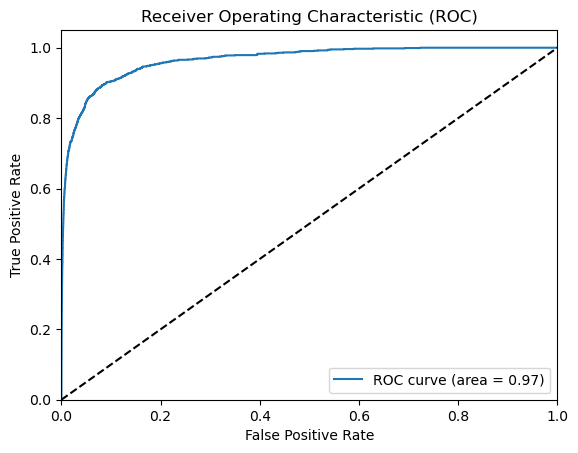

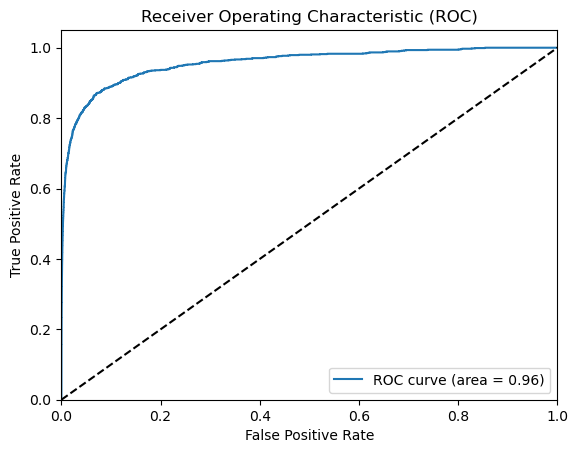

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
pred_tanh = model.predict(x_test)
pred_relu = model_relu.predict(x_test)

plot_roc(pred_tanh,y_test)
plot_roc(pred_relu,y_test)

In [48]:
from sklearn import metrics

score_tanh = metrics.accuracy_score(y_test, np.round(pred_tanh))
score_relu = metrics.accuracy_score(y_test, np.round(pred_relu))

print(f"Accuracy score tanh: {score_tanh}, accuracy score relu: {score_relu}")



Accuracy score tanh: 0.878844161212411, accuracy score relu: 0.9156142780085526


In [49]:
from sklearn.metrics import confusion_matrix

cm_tanh = confusion_matrix(y_test, np.round(pred_tanh))
np.set_printoptions(precision=2)
print(cm_tanh)

cm_relu = confusion_matrix(y_test, np.round(pred_relu))
np.set_printoptions(precision=2)
print(cm_relu)   


[[473165  65273]
 [    89    960]]
[[493039  45399]
 [   126    923]]


# Standardized data: tanh vs. relu

In [3]:
# Standardize,Convert to numpy - Classification
x_train_sm, y_train_sm, x_val, y_val, x_test, y_test = dataLoad()

from sklearn.preprocessing import StandardScaler
trainScaler = StandardScaler()

x_train_scaled = trainScaler.fit_transform(x_train_sm)
x_val_scaled = trainScaler.transform(x_val)
x_test_scaled = trainScaler.transform(x_test)

y_train = y_train_sm.values
y_val = y_val.values
y_test = y_test.values

   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850      v_200     v_85

In [23]:
# Same neural network with standardized data
model_std_tanh = Sequential()
#model.add(Dense(8, input_dim=x.shape[1], activation='relu')) # Hidden 1
model_std_tanh.add(Dense(512, input_dim=8, activation='tanh')) # Hidden 2
model_std_tanh.add(Dense(1,activation='sigmoid')) # Output
model_std_tanh.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_tanh.fit(x_train_scaled,y_train,validation_data=(x_val_scaled,y_val),
        callbacks=[monitor],epochs=10)


Epoch 1/10


2022-10-10 11:45:14.933435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - ETA: 0s - loss: 0.2116

2022-10-10 12:01:31.959416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - 1022s 4ms/step - loss: 0.2116 - val_loss: 0.2022
Epoch 2/10
266255/266255 [==============================] - 1026s 4ms/step - loss: 0.1939 - val_loss: 0.1931
Epoch 3/10
266255/266255 [==============================] - 4109s 15ms/step - loss: 0.1903 - val_loss: 0.2339
Epoch 4/10
266255/266255 [==============================] - 1022s 4ms/step - loss: 0.1882 - val_loss: 0.2186
Epoch 5/10
266255/266255 [==============================] - 1039s 4ms/step - loss: 0.1869 - val_loss: 0.2080
Epoch 6/10
266255/266255 [==============================] - 1019s 4ms/step - loss: 0.1859 - val_loss: 0.2015
Epoch 7/10
266255/266255 [==============================] - 1028s 4ms/step - loss: 0.1849 - val_loss: 0.2264
Epoch 7: early stopping


In [24]:
# Same neural network with Relu and standardized data
model_std_relu = Sequential()
model_std_relu.add(Dense(512, input_dim=8, activation='relu')) # Hidden 2
model_std_relu.add(Dense(1,activation='sigmoid')) # Output
model_std_relu.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu.fit(x_train_scaled,y_train,validation_data=(x_val_scaled,y_val),
        callbacks=[monitor],epochs=10)


Epoch 1/10


2022-10-10 14:36:20.240579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - ETA: 0s - loss: 0.1879

2022-10-10 14:52:35.206412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - 1020s 4ms/step - loss: 0.1879 - val_loss: 0.1995
Epoch 2/10
266255/266255 [==============================] - 1024s 4ms/step - loss: 0.1670 - val_loss: 0.1583
Epoch 3/10
266255/266255 [==============================] - 1033s 4ms/step - loss: 0.1591 - val_loss: 0.1578
Epoch 4/10
266255/266255 [==============================] - 1019s 4ms/step - loss: 0.1545 - val_loss: 0.2194
Epoch 5/10
266255/266255 [==============================] - 1039s 4ms/step - loss: 0.1517 - val_loss: 0.1793
Epoch 6/10
266255/266255 [==============================] - 1047s 4ms/step - loss: 0.1496 - val_loss: 0.1792
Epoch 7/10
266255/266255 [==============================] - 1037s 4ms/step - loss: 0.1480 - val_loss: 0.1746
Epoch 7: early stopping


In [25]:
import os
model_std_tanh.save(os.path.join("/Users/paolo/Documents/TC_old/data/model_1l_512n_tanh_std.h5"))
model_std_relu.save(os.path.join("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_std.h5"))


In [4]:
from tensorflow import keras
from keras.models import load_model
import pandas as pd
model_std_tanh = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_tanh_std.h5")
model_std_relu = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_std.h5")

Metal device set to: Apple M1


2022-10-18 15:53:52.255897: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-18 15:53:52.256893: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
pred_tanh = model_std_tanh.predict(x_train)
pred_relu = model_std_relu.predict(x_train)

plot_roc(pred_tanh,y_train)
plot_roc(pred_relu,y_train)

NameError: name 'x_train' is not defined

In [ ]:
pred_tanh = model_std_tanh.predict(x_val)
pred_relu = model_std_relu.predict(x_val)

plot_roc(pred_tanh,y_val)
plot_roc(pred_relu,y_val)

    1/16859 [..............................] - ETA: 52:45

2022-10-18 15:54:43.722999: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-18 15:54:43.812776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  109/16859 [..............................] - ETA: 23s

2022-10-18 15:55:19.480703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 20s 1ms/step


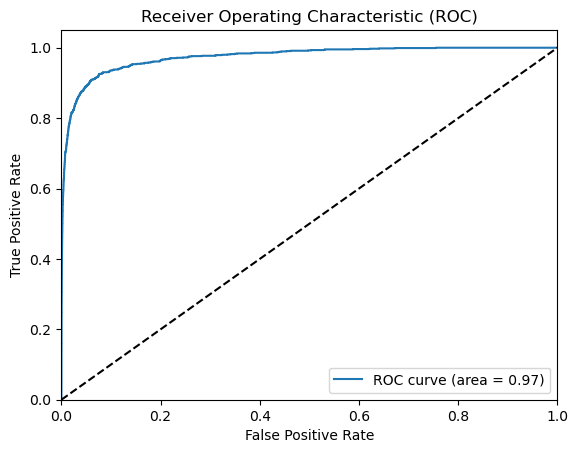

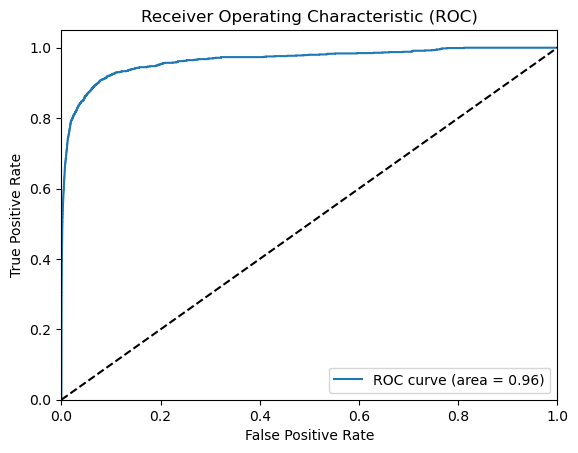

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
pred_tanh = model_std_tanh.predict(x_test_scaled)
pred_relu = model_std_relu.predict(x_test_scaled)

plot_roc(pred_tanh,y_test)
plot_roc(pred_relu,y_test)

In [7]:
from sklearn import metrics

score_tanh = metrics.accuracy_score(y_test, np.round(pred_tanh))
score_relu = metrics.accuracy_score(y_test, np.round(pred_relu))

print(f"Accuracy score tanh: {score_tanh}, accuracy score relu: {score_relu}")



Accuracy score tanh: 0.9299352903777107, accuracy score relu: 0.94245273750804


In [8]:
from sklearn.metrics import confusion_matrix

cm_tanh = confusion_matrix(y_test, np.round(pred_tanh))
np.set_printoptions(precision=2)
print(cm_tanh)

cm_relu = confusion_matrix(y_test, np.round(pred_relu))
np.set_printoptions(precision=2)
print(cm_relu)   


[[500729  37709]
 [    90    959]]
[[507522  30916]
 [   130    919]]


# Standardized data: tanh vs. relu, dropout

In [50]:
# Standardize,Convert to numpy - Classification
x_train_sm, y_train_sm, x_val, y_val, x_test, y_test = dataLoad()

from sklearn.preprocessing import StandardScaler
trainScaler = StandardScaler()

x_train_scaled = trainScaler.fit_transform(x_train_sm)
x_val_scaled = trainScaler.transform(x_val)
x_test_scaled = trainScaler.transform(x_test)

y_train = y_train_sm.values
y_val = y_val.values
y_test = y_test.values

   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850      v_200     v_85

In [51]:
from tensorflow.keras.layers import Dense, Activation, Dropout

# Same neural network with standardized data
model_std_tanh_dropout = Sequential()
model_std_tanh_dropout.add(Dense(512, input_dim=8, activation='tanh')) # Hidden
model_std_tanh_dropout.add(Dropout(0.5))
model_std_tanh_dropout.add(Dense(1,activation='sigmoid')) # Output
model_std_tanh_dropout.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_tanh_dropout.fit(x_train_scaled,y_train,validation_data=(x_val_scaled,y_val),
        callbacks=[monitor],epochs=10)


Epoch 1/10


2022-10-10 23:44:23.597131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - ETA: 0s - loss: 0.2307

2022-10-11 00:01:28.351335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - 1069s 4ms/step - loss: 0.2307 - val_loss: 0.2103
Epoch 2/10
266255/266255 [==============================] - 1049s 4ms/step - loss: 0.2134 - val_loss: 0.2223
Epoch 3/10
266255/266255 [==============================] - 1050s 4ms/step - loss: 0.2094 - val_loss: 0.2067
Epoch 4/10
266255/266255 [==============================] - 1049s 4ms/step - loss: 0.2069 - val_loss: 0.2432
Epoch 5/10
266255/266255 [==============================] - 1050s 4ms/step - loss: 0.2050 - val_loss: 0.2259
Epoch 6/10
266255/266255 [==============================] - 1053s 4ms/step - loss: 0.2037 - val_loss: 0.2459
Epoch 7/10
266255/266255 [==============================] - 1052s 4ms/step - loss: 0.2024 - val_loss: 0.2538
Epoch 8/10
266255/266255 [==============================] - 1053s 4ms/step - loss: 0.2015 - val_loss: 0.2329
Epoch 8: early stopping


In [52]:
# Same neural network with Relu and standardized data
model_std_relu_dropout = Sequential()
model_std_relu_dropout.add(Dense(512, input_dim=8, activation='relu')) # Hidden
model_std_relu_dropout.add(Dropout(0.5))
model_std_relu_dropout.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout.fit(x_train_scaled,y_train,validation_data=(x_val_scaled,y_val),
        callbacks=[monitor],epochs=10)


Epoch 1/10


2022-10-11 02:04:54.651428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - ETA: 0s - loss: 0.2066

2022-10-11 02:21:40.206305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - 1050s 4ms/step - loss: 0.2066 - val_loss: 0.1999
Epoch 2/10
266255/266255 [==============================] - 1052s 4ms/step - loss: 0.1965 - val_loss: 0.1973
Epoch 3/10
266255/266255 [==============================] - 1050s 4ms/step - loss: 0.1937 - val_loss: 0.2138
Epoch 4/10
266255/266255 [==============================] - 1049s 4ms/step - loss: 0.1923 - val_loss: 0.2128
Epoch 5/10
266255/266255 [==============================] - 1048s 4ms/step - loss: 0.1916 - val_loss: 0.1884
Epoch 6/10
266255/266255 [==============================] - 1049s 4ms/step - loss: 0.1909 - val_loss: 0.2070
Epoch 7/10
266255/266255 [==============================] - 1050s 4ms/step - loss: 0.1902 - val_loss: 0.2212
Epoch 8/10
266255/266255 [==============================] - 1048s 4ms/step - loss: 0.1898 - val_loss: 0.1784
Epoch 9/10
266255/266255 [==============================] - 1047s 4ms/step - loss: 0.1893 - val_loss: 0.1945
Epoch 10/10
266255/266255 [===

In [53]:
import os
model_std_tanh_dropout.save(os.path.join("/Users/paolo/Documents/TC_old/data/model_1l_512n_tanh_std_dropout.h5"))
model_std_relu_dropout.save(os.path.join("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_std_dropout.h5"))


    1/16859 [..............................] - ETA: 49:37

2022-10-11 04:59:37.161207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  138/16859 [..............................] - ETA: 18s

2022-10-11 04:59:58.799817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 19s 1ms/step


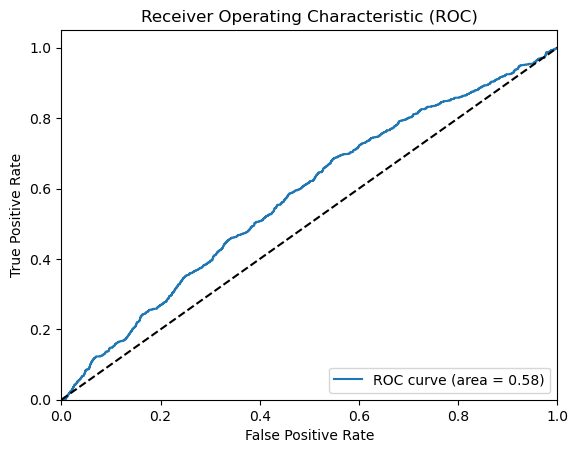

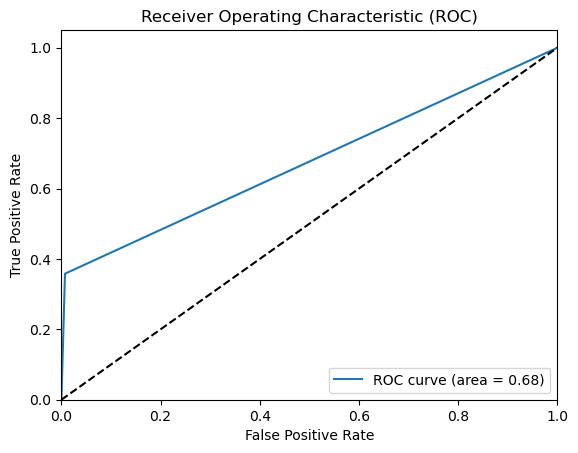

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
pred_tanh = model_std_tanh_dropout.predict(x_test)
pred_relu = model_std_relu_dropout.predict(x_test)

plot_roc(pred_tanh,y_test)
plot_roc(pred_relu,y_test)

In [55]:
from sklearn import metrics

score_tanh = metrics.accuracy_score(y_test, np.round(pred_tanh))
score_relu = metrics.accuracy_score(y_test, np.round(pred_relu))

print(f"Accuracy score tanh: {score_tanh}, accuracy score relu: {score_relu}")



Accuracy score tanh: 0.9980555601895875, accuracy score relu: 0.9915401112538393


In [56]:
from sklearn.metrics import confusion_matrix

cm_tanh = confusion_matrix(y_test, np.round(pred_tanh))
np.set_printoptions(precision=2)
print(cm_tanh)

cm_relu = confusion_matrix(y_test, np.round(pred_relu))
np.set_printoptions(precision=2)
print(cm_relu)   


[[538438      0]
 [  1049      0]]
[[534553   3885]
 [   679    370]]


### minmax

In [3]:
# Standardize,Convert to numpy - Classification
x_train_sm, y_train_sm, x_val, y_val, x_test, y_test = dataLoad()

from sklearn.preprocessing import MinMaxScaler
trainScaler = MinMaxScaler()

x_train_scaled = trainScaler.fit_transform(x_train_sm)
x_val_scaled = trainScaler.transform(x_val)
x_test_scaled = trainScaler.transform(x_test)

y_train = y_train_sm.values
y_val = y_val.values
y_test = y_test.values

   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850      v_200     v_85

In [5]:
from tensorflow.keras.layers import Dense, Activation, Dropout

# Same neural network with standardized data
model_minmax_tanh_dropout = Sequential()
model_minmax_tanh_dropout.add(Dense(512, input_dim=8, activation='tanh')) # Hidden
model_minmax_tanh_dropout.add(Dropout(0.5))
model_minmax_tanh_dropout.add(Dense(1,activation='sigmoid')) # Output
model_minmax_tanh_dropout.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_minmax_tanh_dropout.fit(x_train_scaled,y_train,validation_data=(x_val_scaled,y_val),
        callbacks=[monitor],epochs=50)


Epoch 1/50


2022-10-11 14:20:50.101659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - ETA: 0s - loss: 0.3431

2022-10-11 14:37:51.605177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - 1069s 4ms/step - loss: 0.3431 - val_loss: 0.4829
Epoch 2/50
266255/266255 [==============================] - 1105s 4ms/step - loss: 0.2811 - val_loss: 0.3100
Epoch 3/50
266255/266255 [==============================] - 1088s 4ms/step - loss: 0.2616 - val_loss: 0.2177
Epoch 4/50
266255/266255 [==============================] - 1132s 4ms/step - loss: 0.2509 - val_loss: 0.1913
Epoch 5/50
266255/266255 [==============================] - 1102s 4ms/step - loss: 0.2455 - val_loss: 0.2788
Epoch 6/50
266255/266255 [==============================] - 1106s 4ms/step - loss: 0.2421 - val_loss: 0.2708
Epoch 7/50
266255/266255 [==============================] - 1133s 4ms/step - loss: 0.2393 - val_loss: 0.4124
Epoch 8/50
266255/266255 [==============================] - 1087s 4ms/step - loss: 0.2372 - val_loss: 0.4316
Epoch 9/50
266255/266255 [==============================] - 1122s 4ms/step - loss: 0.2353 - val_loss: 0.4053
Epoch 9: early stopping


In [6]:
# Same neural network with Relu and standardized data
model_minmax_relu_dropout = Sequential()
model_minmax_relu_dropout.add(Dense(512, input_dim=8, activation='relu')) # Hidden
model_minmax_relu_dropout.add(Dropout(0.5))
model_minmax_relu_dropout.add(Dense(1,activation='sigmoid')) # Output
model_minmax_relu_dropout.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_minmax_relu_dropout.fit(x_train_scaled,y_train,validation_data=(x_val_scaled,y_val),
        callbacks=[monitor],epochs=20)


Epoch 1/20


2022-10-11 18:18:48.132628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - ETA: 0s - loss: 0.2507

2022-10-11 18:35:49.980088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - 1065s 4ms/step - loss: 0.2507 - val_loss: 0.1792
Epoch 2/20
266255/266255 [==============================] - 1054s 4ms/step - loss: 0.2304 - val_loss: 0.1948
Epoch 3/20
266255/266255 [==============================] - 1054s 4ms/step - loss: 0.2258 - val_loss: 0.2119
Epoch 4/20
266255/266255 [==============================] - 1051s 4ms/step - loss: 0.2229 - val_loss: 0.1889
Epoch 5/20
266255/266255 [==============================] - 1051s 4ms/step - loss: 0.2210 - val_loss: 0.1848
Epoch 6/20
266255/266255 [==============================] - 1061s 4ms/step - loss: 0.2197 - val_loss: 0.1858
Epoch 6: early stopping


In [8]:
import os
model_minmax_tanh_dropout.save(os.path.join("/Users/paolo/Documents/TC_old/data/model_1l_512n_tanh_minmax_dropout.h5"))
model_minmax_relu_dropout.save(os.path.join("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_minmax_dropout.h5"))


   14/16859 [..............................] - ETA: 1:14   

2022-10-11 21:09:45.446340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  119/16859 [..............................] - ETA: 21s

2022-10-11 21:10:20.225703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 20s 1ms/step


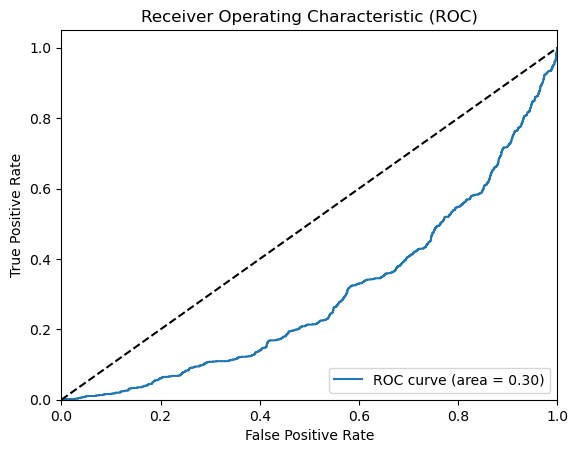

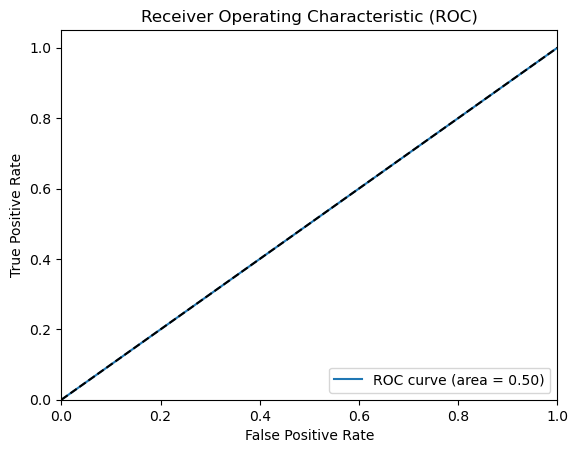

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
pred_tanh = model_minmax_tanh_dropout.predict(x_test)
pred_relu = model_minmax_relu_dropout.predict(x_test)

plot_roc(pred_tanh,y_test)
plot_roc(pred_relu,y_test)

In [10]:
from sklearn import metrics

score_tanh = metrics.accuracy_score(y_test, np.round(pred_tanh))
score_relu = metrics.accuracy_score(y_test, np.round(pred_relu))

print(f"Accuracy score tanh: {score_tanh}, accuracy score relu: {score_relu}")



Accuracy score tanh: 0.9681160065024736, accuracy score relu: 0.9980555601895875


In [11]:
from sklearn.metrics import confusion_matrix

cm_tanh = confusion_matrix(y_test, np.round(pred_tanh))
np.set_printoptions(precision=2)
print(cm_tanh)

cm_relu = confusion_matrix(y_test, np.round(pred_relu))
np.set_printoptions(precision=2)
print(cm_relu)   


[[522283  16155]
 [  1046      3]]
[[538438      0]
 [  1049      0]]


# Results

In [1]:
import tensorflow as tf

print(f'tensorflow version {tf.__version__}')

from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 

import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

from keras.models import load_model
from sklearn.preprocessing import StandardScaler


tensorflow version 2.10.0


In [2]:
def dataLoad():
    test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')
    train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv')
    val = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv')
    print(train.head())
    
    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******training features******")
    print (x_train)
    y_train = train[['Real_tom_lsm']]
    print ("******training target******")
    print (y_train)
    
    x_test = test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******test features******")
    print (x_test)
    y_test = test[['Real_tom_lsm']]
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******validation features******")
    print (x_val)
    y_val = val[['Real_tom_lsm']]
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
def test_models(model_tanh, model_relu, x_test, y_test):
    
    pred_tanh = model_tanh.predict(x_test)
    pred_relu = model_relu.predict(x_test)

    plot_roc(pred_tanh,y_test)
    plot_roc(pred_relu,y_test)


    score_tanh = metrics.accuracy_score(y_test, np.round(pred_tanh))
    score_relu = metrics.accuracy_score(y_test, np.round(pred_relu))
    print(f"Accuracy score tanh: {score_tanh}, accuracy score relu: {score_relu}")


    cm_tanh = confusion_matrix(y_test, np.round(pred_tanh))
    np.set_printoptions(precision=2)
    print(cm_tanh)

    cm_relu = confusion_matrix(y_test, np.round(pred_relu))
    np.set_printoptions(precision=2)
    print(cm_relu)   


In [9]:
### Results

# Data
x_train_sm, y_train_sm, x_val, y_val, x_test, y_test = dataLoad()

trainScaler = StandardScaler()
x_train_scaled = trainScaler.fit_transform(x_train_sm)
x_val_scaled = trainScaler.transform(x_val)
x_test_scaled = trainScaler.transform(x_test)

from sklearn.preprocessing import MinMaxScaler
trainMinmax = MinMaxScaler()

x_train_minmax = trainMinmax.fit_transform(x_train_sm)
x_val_minmax = trainMinmax.transform(x_val)
x_test_minmax = trainMinmax.transform(x_test)


# Feedforward 1l 512n, not scaled, no dropout
model_1l_512n_tanh = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_tanh.h5")
model_1l_512n_relu = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu.h5")

# Feedforward 1l 512n, standardized, no dropout
model_1l_512n_tanh_std = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_tanh_std.h5")
model_1l_512n_relu_std = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_std.h5")

# Feedforward 1l 512n, standardized, 0.5 dropout
model_1l_512n_tanh_std_dropout = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_tanh_std_dropout.h5")
model_1l_512n_relu_std_dropout = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_std_dropout.h5")

# Feedforward 1l 512n, minmax, 0.5 dropout
model_1l_512n_tanh_minmax_dropout = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_tanh_minmax_dropout.h5")
model_1l_512n_relu_minmax_dropout = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_minmax_dropout.h5")



   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850      v_200     v_85

    1/16859 [..............................] - ETA: 1:22:46

2022-10-20 15:06:29.346084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   93/16859 [..............................] - ETA: 27s

2022-10-20 15:06:54.250933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 24s 1ms/step


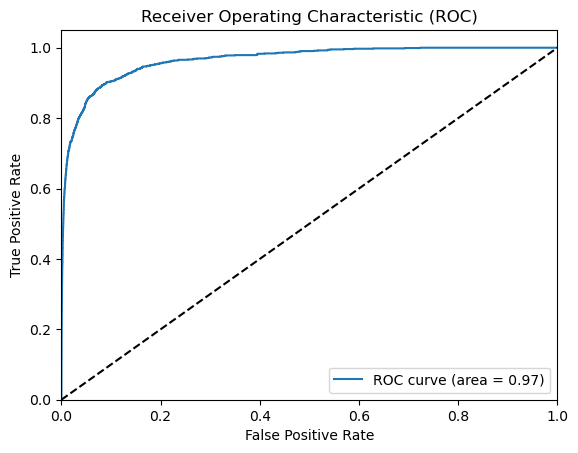

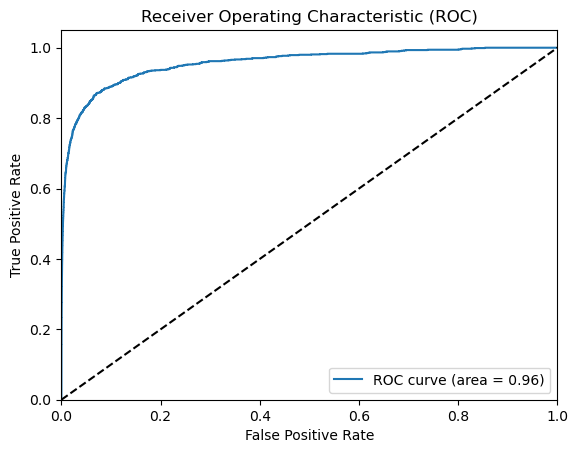

Accuracy score tanh: 0.878844161212411, accuracy score relu: 0.9156142780085526
[[473165  65273]
 [    89    960]]
[[493039  45399]
 [   126    923]]


In [10]:
test_models(model_1l_512n_tanh, model_1l_512n_relu, x_test, y_test)

    6/16859 [..............................] - ETA: 3:02   

2022-10-20 15:07:29.103423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   59/16859 [..............................] - ETA: 29s 

2022-10-20 15:07:55.208181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 22s 1ms/step


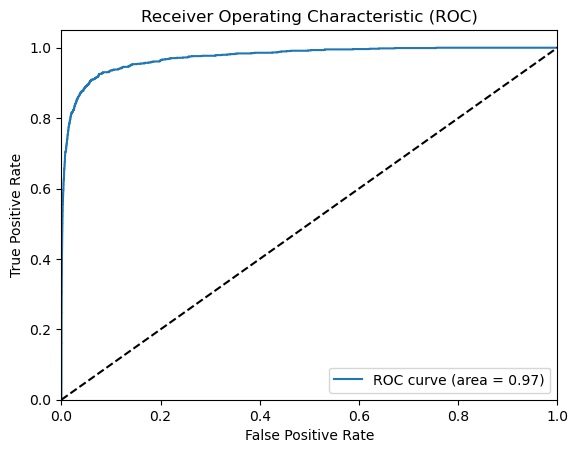

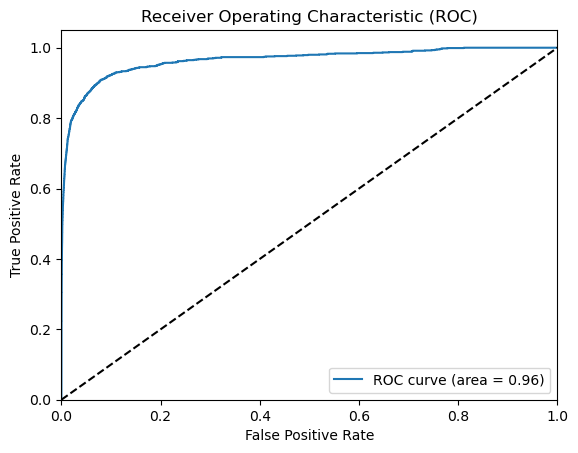

Accuracy score tanh: 0.9299297295393587, accuracy score relu: 0.9424304941546321
[[500725  37713]
 [    89    960]]
[[507510  30928]
 [   130    919]]


In [11]:
test_models(model_1l_512n_tanh_std, model_1l_512n_relu_std, x_test_scaled, y_test)

   90/16859 [..............................] - ETA: 28s

2022-10-20 15:08:20.881767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  121/16859 [..............................] - ETA: 21s

2022-10-20 15:08:44.855450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 22s 1ms/step


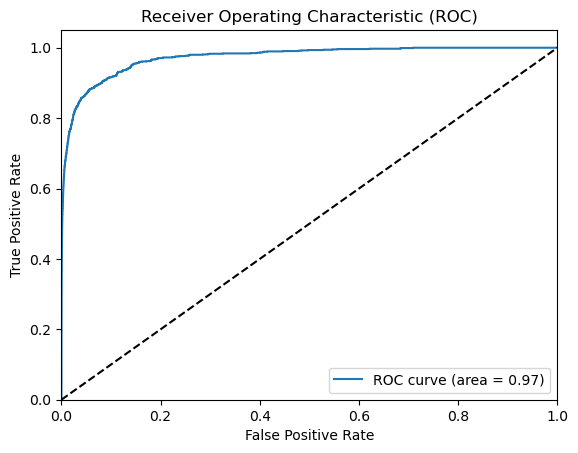

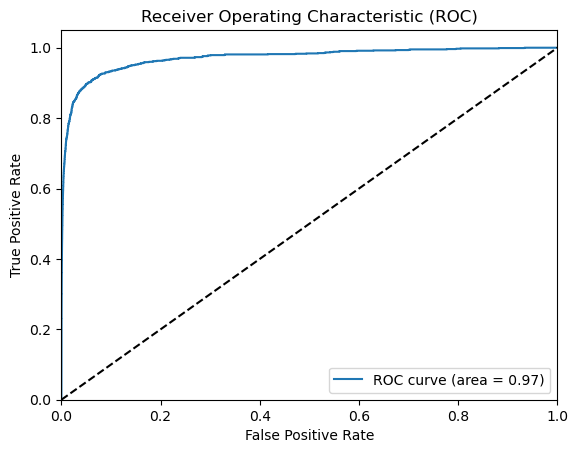

Accuracy score tanh: 0.9193085282870579, accuracy score relu: 0.9184873778237473
[[495011  43427]
 [   105    944]]
[[494541  43897]
 [    78    971]]


In [12]:
test_models(model_1l_512n_tanh_std_dropout, model_1l_512n_relu_std_dropout, x_test_scaled, y_test)

   49/16859 [..............................] - ETA: 36s 

2022-10-20 15:09:10.658233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


   93/16859 [..............................] - ETA: 27s

2022-10-20 15:09:35.937565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 23s 1ms/step


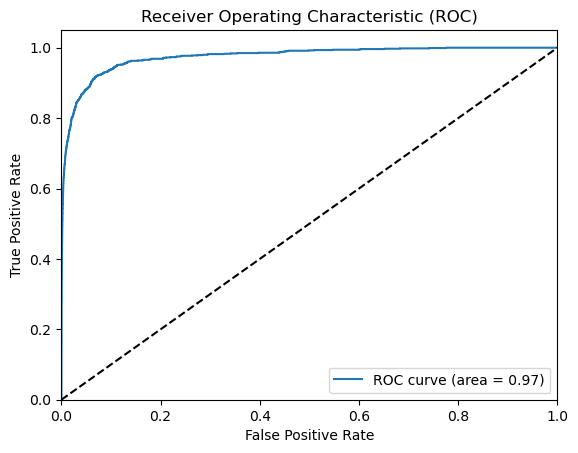

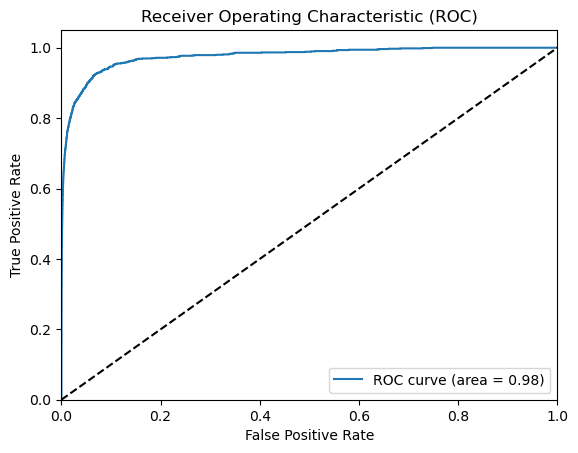

Accuracy score tanh: 0.9376463195591367, accuracy score relu: 0.9361263570762595
[[504897  33541]
 [    98    951]]
[[504064  34374]
 [    85    964]]


In [13]:
test_models(model_1l_512n_tanh_minmax_dropout, model_1l_512n_relu_minmax_dropout, x_test_minmax, y_test)


# Final models

In [3]:
# Standardize,Convert to numpy - Classification
x_train_sm, y_train_sm, x_val, y_val, x_test, y_test = dataLoad()

from sklearn.preprocessing import StandardScaler
trainScaler = StandardScaler()

x_train_scaled = trainScaler.fit_transform(x_train_sm)
x_val_scaled = trainScaler.transform(x_val)
x_test_scaled = trainScaler.transform(x_test)

y_train = y_train_sm.values
y_val = y_val.values
y_test = y_test.values

   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850      v_200     v_85

### 1) SMOTE, relu, dropout=0.5, std data, 512n 1l

In [6]:
model_std_relu_dropout = Sequential()
model_std_relu_dropout.add(Dense(512, input_dim=8, activation='relu'))
model_std_relu_dropout.add(Dropout(0.5))
model_std_relu_dropout.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout.fit(x_train_scaled,y_train,validation_data=(x_val_scaled,y_val),
        callbacks=[monitor],epochs=10)


Epoch 1/10


2022-10-29 10:16:28.203497: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-29 10:16:28.926704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - ETA: 0s - loss: 0.2066

2022-10-29 10:34:07.298912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - 1103s 4ms/step - loss: 0.2066 - val_loss: 0.2150
Epoch 2/10
266255/266255 [==============================] - 1158s 4ms/step - loss: 0.1966 - val_loss: 0.2004
Epoch 3/10
266255/266255 [==============================] - 1196s 4ms/step - loss: 0.1942 - val_loss: 0.2154
Epoch 4/10
266255/266255 [==============================] - 1136s 4ms/step - loss: 0.1929 - val_loss: 0.2096
Epoch 5/10
266255/266255 [==============================] - 1110s 4ms/step - loss: 0.1920 - val_loss: 0.2095
Epoch 6/10
266255/266255 [==============================] - 1208s 5ms/step - loss: 0.1912 - val_loss: 0.2279
Epoch 7/10
266255/266255 [==============================] - 4653s 17ms/step - loss: 0.1906 - val_loss: 0.1673
Epoch 8/10
266255/266255 [==============================] - 1084s 4ms/step - loss: 0.1901 - val_loss: 0.1925
Epoch 9/10
266255/266255 [==============================] - 1145s 4ms/step - loss: 0.1896 - val_loss: 0.1943
Epoch 10/10
266255/266255 [==

### 2) SMOTE, relu, dropout=0.5, std data, 256n 4l

In [7]:
model_std_relu_dropout_256 = Sequential()
model_std_relu_dropout_256.add(Dense(256, input_dim=8, activation='relu'))
model_std_relu_dropout_256.add(Dropout(0.5))
model_std_relu_dropout_256.add(Dense(256, activation='relu'))
model_std_relu_dropout_256.add(Dropout(0.5))
model_std_relu_dropout_256.add(Dense(256, activation='relu'))
model_std_relu_dropout_256.add(Dropout(0.5))
model_std_relu_dropout_256.add(Dense(256, activation='relu'))
model_std_relu_dropout_256.add(Dropout(0.5))
model_std_relu_dropout_256.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout_256.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout_256.fit(x_train_scaled,y_train,validation_data=(x_val_scaled,y_val),
        callbacks=[monitor],epochs=10)


Epoch 1/10


2022-10-29 14:25:20.103012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - ETA: 0s - loss: 0.2072

2022-10-29 14:59:55.773462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - 2123s 8ms/step - loss: 0.2072 - val_loss: 0.2947
Epoch 2/10
266255/266255 [==============================] - 1615s 6ms/step - loss: 0.2017 - val_loss: 0.3238
Epoch 3/10
266255/266255 [==============================] - 1586s 6ms/step - loss: 0.2006 - val_loss: 0.3441
Epoch 4/10
266255/266255 [==============================] - 1601s 6ms/step - loss: 0.2047 - val_loss: 0.2951
Epoch 5/10
266255/266255 [==============================] - 1588s 6ms/step - loss: 0.2101 - val_loss: 0.4074
Epoch 6/10
266255/266255 [==============================] - 1582s 6ms/step - loss: 0.2041 - val_loss: 0.7262
Epoch 6: early stopping


In [9]:
import os
model_std_relu_dropout.save(os.path.join("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_dropout_std.h5"))


In [2]:
from keras.models import load_model

model_512 = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_dropout_std.h5")
model_256 = load_model("/Users/paolo/Documents/TC_old/data/model_4l_256n_relu_dropout_std.h5")


Metal device set to: Apple M1


2022-11-07 10:50:30.224030: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-07 10:50:30.224288: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


OSError: No file or directory found at /Users/paolo/Documents/TC_old/data/model_4l_256n_relu_dropout_std.h5

    6/16859 [..............................] - ETA: 3:55   

2022-10-29 17:29:26.772958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 21s 1ms/step


2022-10-29 17:30:08.066898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 31s 2ms/step


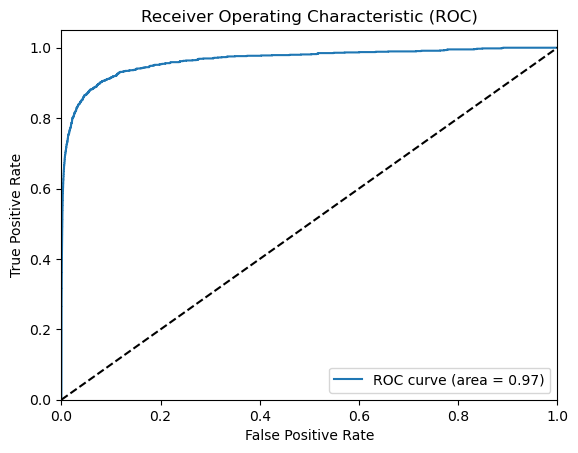

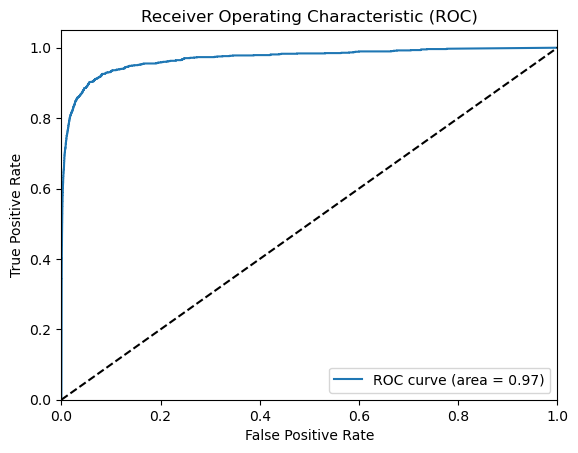

Accuracy score tanh: 0.926422694152037, accuracy score relu: 0.8704361736242022
[[498854  39584]
 [   110    939]]
[[468598  69840]
 [    58    991]]


In [12]:
test_models(model_std_relu_dropout, model_std_relu_dropout_256, x_test_scaled, y_test)
